In [1]:
from AVLTree import *
from print_tree import *
from plotting import analyze_experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vector = [i for i in range(0,20,2)]
T = AVLTree()
for i in vector:
    T.insert_from_max(i,i)


In [3]:
printree(T)

          6                        
     ____/ \____________           
    2                   14         
  _/ \_           _____/  \_       
 0     4        10          16     
              _/  \_         \_   
             8      12          18 


In [4]:
T.insert_from_max(9, 9)

(10, 5)

In [5]:
L = [a[0] for a in T.avl_to_array()]

In [6]:
len([a for a in L if a < 90])

11

In [7]:
T.insert(90,90)
T.rank(T.search(90))

12

In [8]:
### Experiment ###

# preallocate df
df = pd.DataFrame(index=range(1,6),
                  columns=['n',
                           'Sorted Inverted Arary - Number of Substitutions',
                           'Sorted Inverted Arary - Sorting Cost',
                           'Random Array - Number of Substitutions',
                           'Random Array - Sorting Cost'])
df['n'] = [1111*(2**i) for i in range(1,6)]
# run inverted array experiment:
for i in range(1,6):
    array = [i for i in range(1, 1111*(2**i) + 1)][::-1]
    T = AVLTree()
    sorting_cost = 0
    num_substitutions = 0
    for x in array:
        cost, subs = T.insert_from_max(x, x)
        sorting_cost += cost
        num_substitutions += subs
    df.loc[i, 'Sorted Inverted Arary - Number of Substitutions'] = num_substitutions
    df.loc[i, 'Sorted Inverted Arary - Sorting Cost'] = sorting_cost

# run random array experiment:
for i in range(1,6):
    array = np.random.permutation([i for i in range(1, 1111*(2**i) + 1)])
    T = AVLTree()
    sorting_cost = 0
    num_substitutions = 0
    for x in array:
        cost, subs = T.insert_from_max(x, x)
        sorting_cost += cost
        num_substitutions += subs
    df.loc[i, 'Random Array - Number of Substitutions'] = num_substitutions
    df.loc[i, 'Random Array - Sorting Cost'] = sorting_cost

In [9]:
df

,n,Sorted Inverted Arary - Number of Substitutions,Sorted Inverted Arary - Sorting Cost,Random Array - Number of Substitutions,Random Array - Sorting Cost
1,2222,2467531,48356,1240750,41888
2,4444,9872346,105624,4831019,93442
3,8888,39493828,229050,19796369,206288
4,17776,157984200,493680,78779844,450865
5,35552,631954576,1058494,315683415,990608


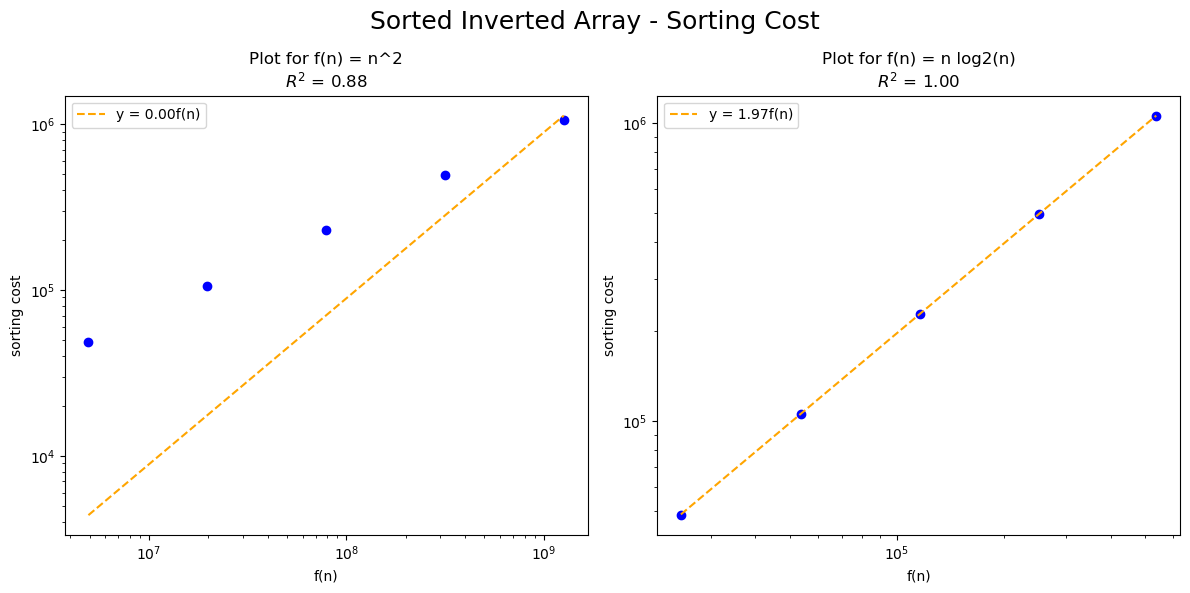

(0.8760385056934958, 0.9999988947493234)

In [10]:
analyze_experiment(np.array(df['n'].to_numpy(dtype=int)), 
                   df['Sorted Inverted Arary - Sorting Cost'].to_numpy(dtype=int),
                   log_scale=True,
                   ylabel='sorting cost',
                   suptitle='Sorted Inverted Array - Sorting Cost')

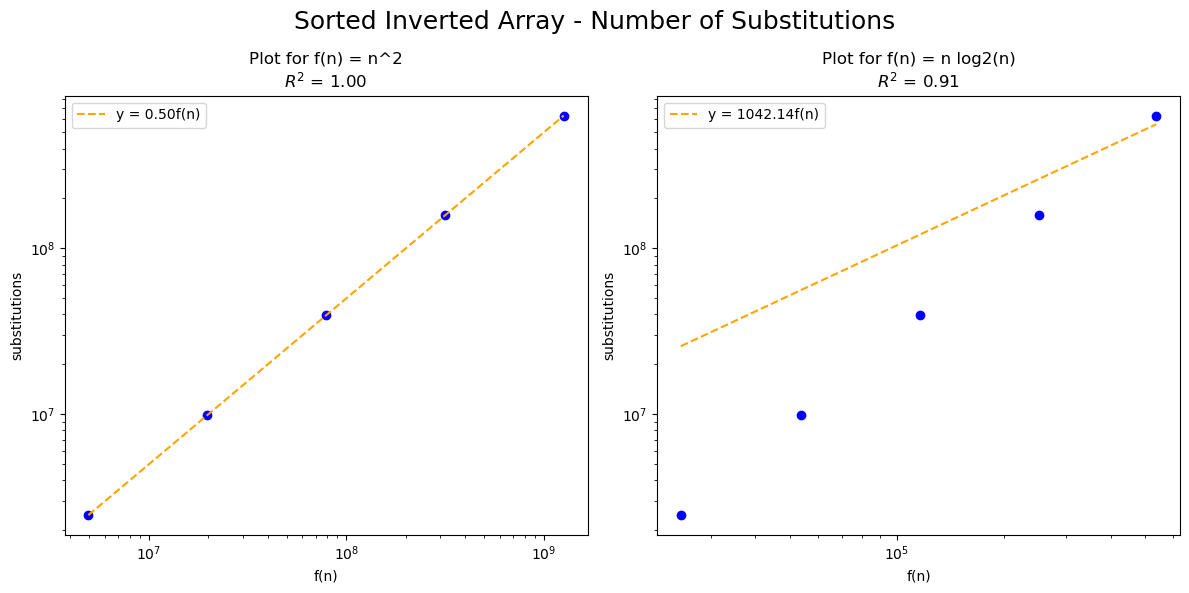

(0.9999999998803795, 0.9110381248882846)

In [11]:
analyze_experiment(np.array(df['n'].to_numpy(dtype=int)), 
                   df['Sorted Inverted Arary - Number of Substitutions'].to_numpy(dtype=int),
                   log_scale=True,
                   ylabel='substitutions',
                   suptitle='Sorted Inverted Array - Number of Substitutions')

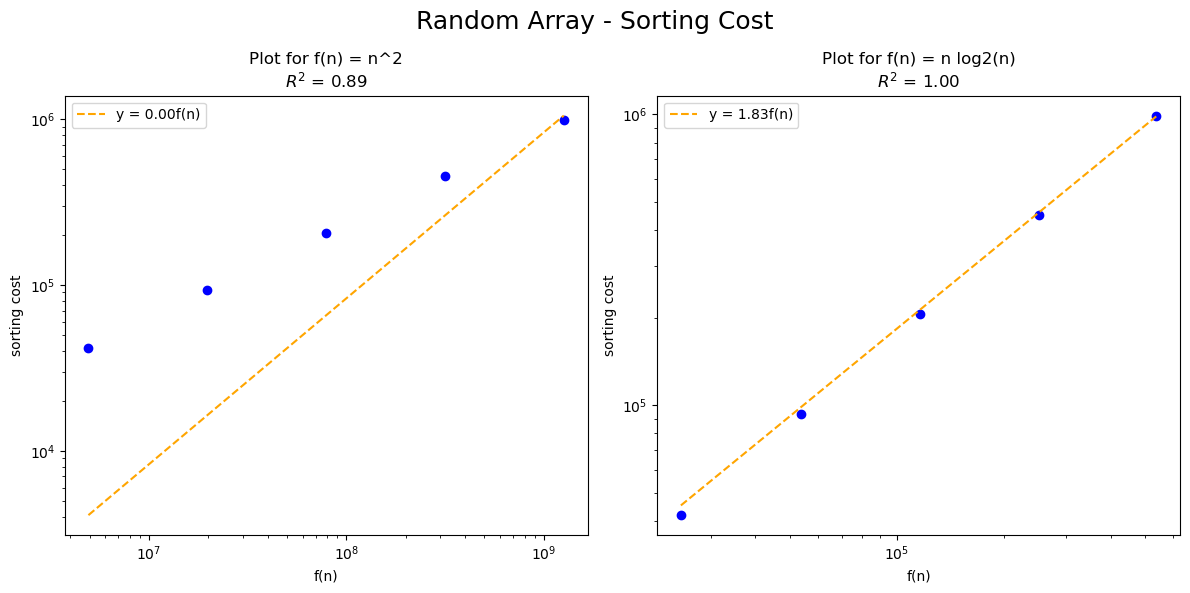

(0.8900643923737754, 0.9996570150335613)

In [12]:
analyze_experiment(np.array(df['n'].to_numpy(dtype=int)), 
                   df['Random Array - Sorting Cost'].to_numpy(dtype=int),
                   log_scale=True,
                   ylabel='sorting cost',
                   suptitle='Random Array - Sorting Cost')

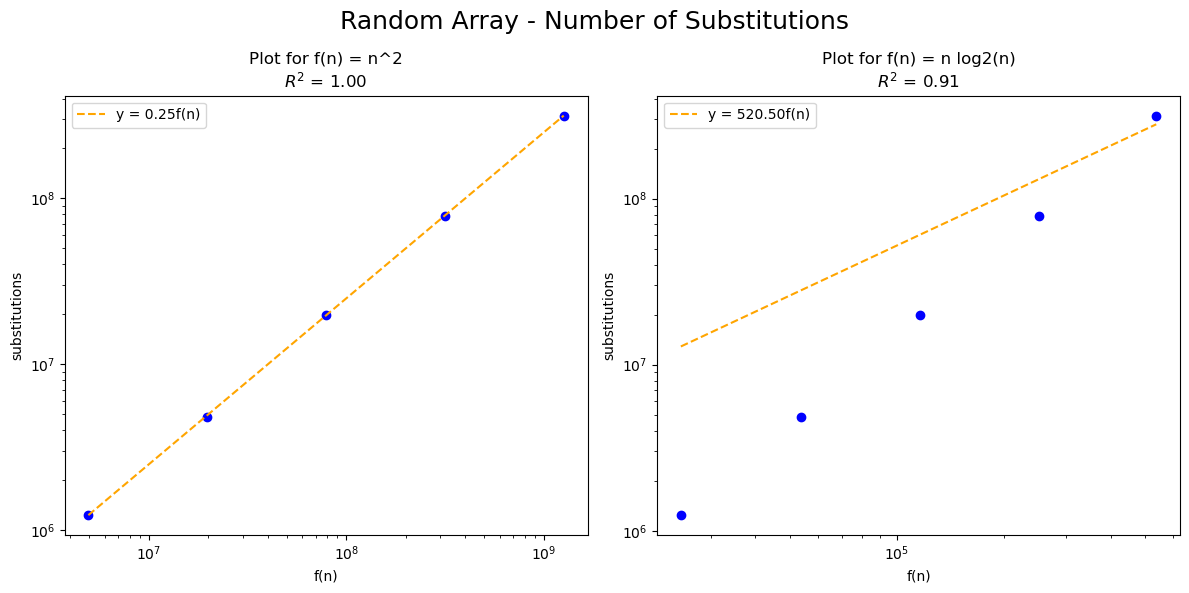

(0.999999526008118, 0.9108599623672899)

In [13]:
analyze_experiment(np.array(df['n'].to_numpy(dtype=int)), 
                   df['Random Array - Number of Substitutions'].to_numpy(dtype=int),
                   log_scale=True,
                   ylabel='substitutions',
                   suptitle='Random Array - Number of Substitutions')